<a href="https://colab.research.google.com/github/anand-bidwalkar/SIT796-Reinforcement-Learning/blob/master/Task-7.1D/SIT_796_Task_7_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github Link - https://github.com/anand-bidwalkar/SIT796-Reinforcement-Learning/blob/master/Task-7.1D/SIT_796_Task_7_1D.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

In [2]:
class CustomLinearEnv(Env):
    def __init__(self):
        self.action_space = Discrete(3)
        self.observation_space = Box(low=np.array([0]), high=np.array([100]))
        self.state = 38 + random.randint(-3,3)
        self.shower_length = 60
        
    def step(self, action):
 
        self.state += action -1 
        self.shower_length -= 1 
        
        if self.state >=37 and self.state <=39: 
            reward =1 
        else: 
            reward = -1 
        
        if self.shower_length <= 0: 
            done = True
        else:
            done = False
        info = {}
        
        return self.state, reward, done, info

    def render(self):
        pass
    
    def reset(self):
        self.state = 38 + random.randint(-3,3)        
        self.shower_length = 60 
        return self.state

In [3]:
def semi_gradient(env, policy, ep, gamma, alpha, init_w, v_hat, grad_v_hat):
    w = init_w()
    rewards_episode = []
        
    for e in range(ep):
        S = env.reset()
        total_rw = 0
        while True:
            A = policy(S)
            S_, R, done, info = env.step(A)
            w = w + alpha * (R + gamma * v_hat(S_, w) - v_hat(S, w)) * grad_v_hat(S, w)
            S = S_
            total_rw += R
            if done: 
              break
        rewards_episode.append((e, total_rw))
    
    return w, rewards_episode

In [4]:
def init_w():
    return np.zeros(10)   
        
def v_hat(St, w):
    if St in [0, 1001]: return 0    
    group = (St-1) // 100           
    return w[group]
    
def grad_v_hat(St, w):
    grad = np.zeros_like(w)
    grad[(St-1)//100] = 1           
    return grad

In [17]:
env = CustomLinearEnv()

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [20]:
def policy(st):
    return np.random.choice([0, 1, 2])

In [21]:
weights, rewards_episode = semi_gradient(env, policy, ep=1000, gamma=1., alpha=0.1,
                            init_w=init_w, v_hat=v_hat, grad_v_hat=grad_v_hat)

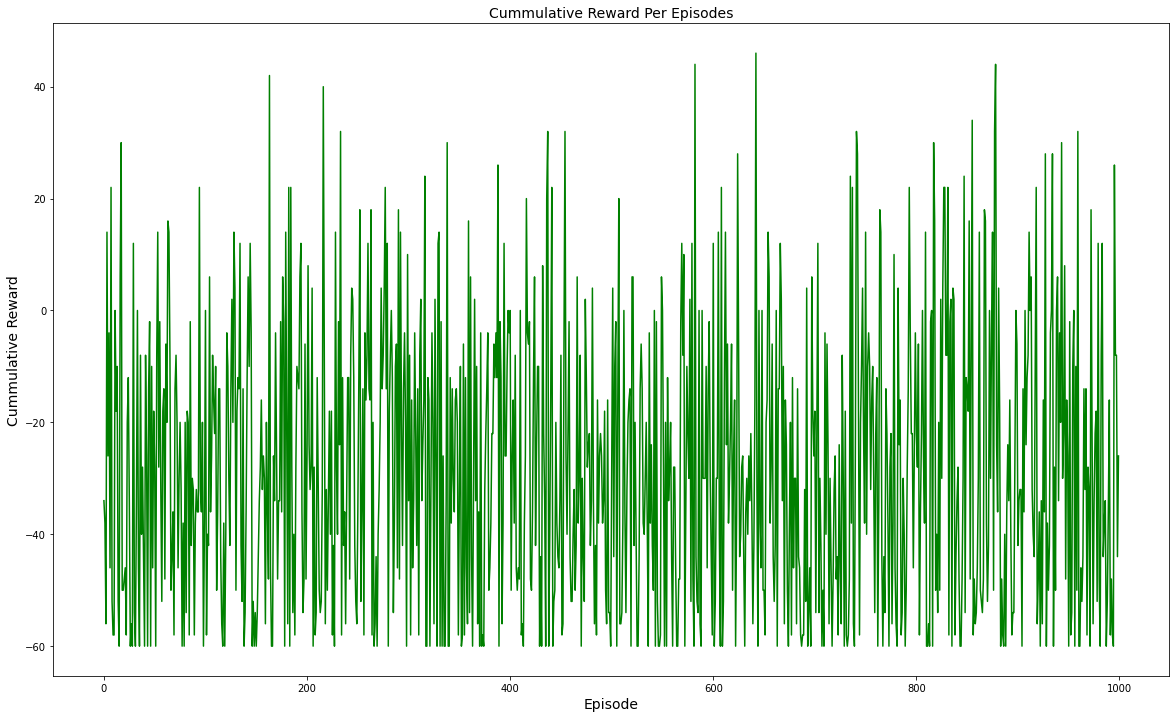

In [22]:
# plot cummulative reward per episodes
Rx = [x for x, y in rewards_episode]
Ry = [y for x, y in rewards_episode]

plt.figure(figsize=(20, 12))
plt.plot(Rx, Ry,color='green')
plt.title('Cummulative Reward Per Episodes', fontsize=14)
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Cummulative Reward', fontsize=14)
plt.grid(False)
plt.show()

Sarsa with Function Approximator

In [23]:
def semi_gradient_TD(env, policy, ep, gamma, model):
    episode_rws = []
    for e in range(ep):
        S = env.reset()
        total_rws = 0
        while True:
            A = policy(S)
            S_, R, done, info = env.step(A)
            model.train(S, R + gamma * model.evaluate(S_))
            S = S_
            total_rws += R
            if done: 
              break
            episode_rws.append((e, total_rws))
    return episode_rws

In [24]:
class AggregateFunctApprox():
    def __init__(self, learn_rate, nb_groups, group_size):
        self._lr = learn_rate
        self._nb_groups = nb_groups
        self._group_size = group_size
        self._w = np.zeros(nb_groups)
        
    def evaluate(self, state):
        if state <= 0 or state > self._nb_groups * self._group_size:
            return 0
        group = (state-1) // self._group_size
        return self._w[group]
    
    def train(self, state, target):        
        group = (state-1) // self._group_size
        self._w[group] += self._lr * (target - self._w[group])

In [25]:
model = AggregateFunctApprox(learn_rate=0.1, nb_groups=10, group_size=100)
episode_rws = semi_gradient_TD(env, policy, ep=1000, gamma=1.0, model=model)

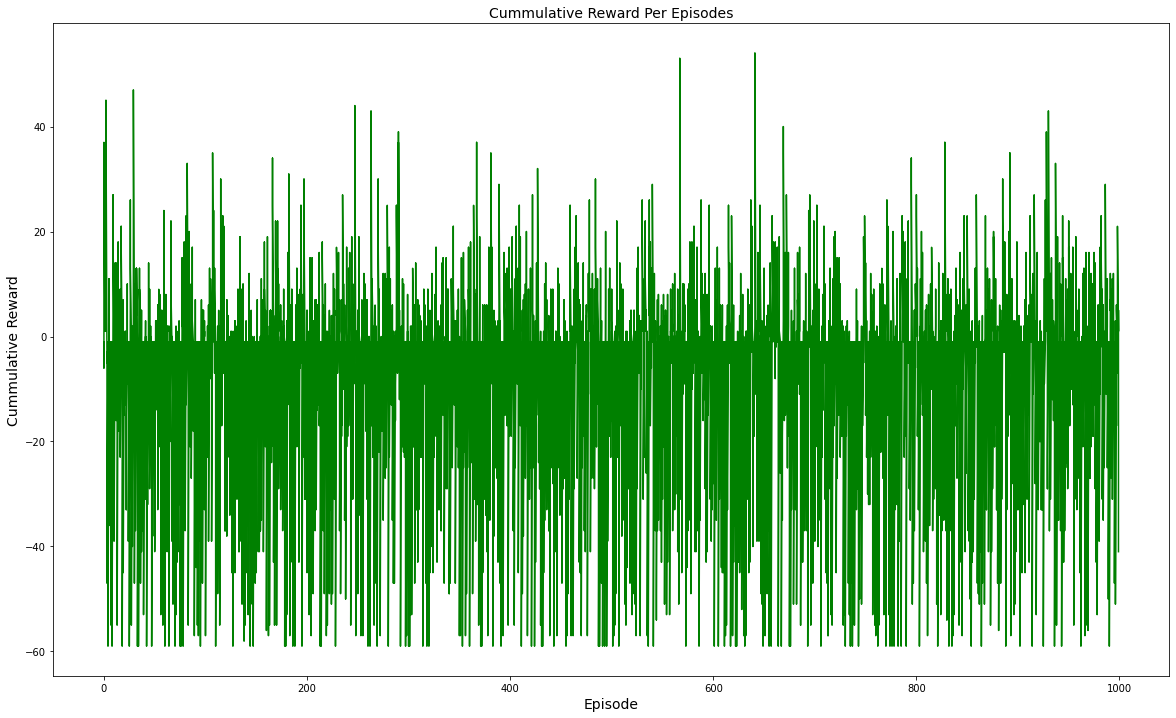

In [26]:
# plot cummulative reward per episodes
Rx = [x for x, y in episode_rws]
Ry = [y for x, y in episode_rws]

plt.figure(figsize=(20, 12))
plt.plot(Rx, Ry,color='green')
plt.title('Cummulative Reward Per Episodes', fontsize=14)
plt.xlabel('Episode', fontsize=14)
plt.ylabel('Cummulative Reward', fontsize=14)
plt.grid(False)
plt.show()